In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import gaussian_kde

In [2]:
raw_data = pd.read_csv('Preprocessing_of_categorical_variables.csv')
raw_data.head()

,Location,State/Province,Latitude,Longitute,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,New South Wales,-36.0737,146.9135,13.4,22.9,0.6,NaN,NaN,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,0
1,Albury,New South Wales,-36.0737,146.9135,7.4,25.1,0.0,NaN,NaN,WNW,...,44.0,25.0,1010.6,1007.8,7.0,6.0,17.2,24.3,No,0
2,Albury,New South Wales,-36.0737,146.9135,17.5,32.3,1.0,NaN,NaN,W,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Albury,New South Wales,-36.0737,146.9135,14.6,29.7,0.2,NaN,NaN,WNW,...,55.0,23.0,1009.2,1005.4,7.0,6.0,20.6,28.9,No,0
4,Albury,New South Wales,-36.0737,146.9135,7.7,26.7,0.0,NaN,NaN,W,...,48.0,19.0,1013.4,1010.1,1.0,7.0,16.3,25.5,No,0


In [3]:
weather_data = raw_data.copy()

In [4]:
weather_data.shape

(92137, 25)

In [5]:
round( weather_data.isnull().sum()/ weather_data.shape[0] *100,1)

Location           0.0
State/Province     0.0
Latitude           0.0
Longitute          0.0
MinTemp            0.1
MaxTemp            0.0
Rainfall           0.0
Evaporation       42.0
Sunshine          46.9
WindGustDir        0.0
WindGustSpeed      0.0
WindDir9am         0.0
WindDir3pm         0.0
WindSpeed9am       0.1
WindSpeed3pm       0.2
Humidity9am        0.9
Humidity3pm        1.4
Pressure9am        7.5
Pressure3pm        7.6
Cloud9am           0.0
Cloud3pm           0.0
Temp9am            0.3
Temp3pm            0.8
RainToday          0.0
RainTomorrow       0.0
dtype: float64

In [6]:
#weather_data = weather_data.dropna(subset=['MinTemp','Rainfall','WindSpeed9am','WindSpeed3pm','Humidity9am'])
# Often happens that missing observations occur in the same row in few variables, so that sometimes it is sufficient to 
# remove nulls just from few variables to have completed data
weather_data = weather_data.dropna(subset=['Pressure9am','Humidity3pm','Humidity9am','WindSpeed9am','MinTemp','MaxTemp','WindSpeed3pm','Pressure3pm'])

# weather_data.isnull().sum()/ weather_data.shape[0] *100
weather_data.isnull().sum()
#Attention -> function may show 0% of nulls in the row but in realty there will be some null values, however
#they occupy less than 0.1%  -> so do not use % here or do not round numbers !!! 

Location              0
State/Province        0
Latitude              0
Longitute             0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation       31361
Sunshine          35318
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday             0
RainTomorrow          0
dtype: int64

In [7]:
weather_data.shape
# 83899 records still good

(83801, 25)

In [8]:
weather_data_partly_preprocessed = weather_data.copy()

In [9]:
weather_data_partly_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83801 entries, 0 to 92136
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        83801 non-null  object 
 1   State/Province  83801 non-null  object 
 2   Latitude        83801 non-null  float64
 3   Longitute       83801 non-null  float64
 4   MinTemp         83801 non-null  float64
 5   MaxTemp         83801 non-null  float64
 6   Rainfall        83801 non-null  float64
 7   Evaporation     52440 non-null  float64
 8   Sunshine        48483 non-null  float64
 9   WindGustDir     83801 non-null  object 
 10  WindGustSpeed   83801 non-null  float64
 11  WindDir9am      83801 non-null  object 
 12  WindDir3pm      83801 non-null  object 
 13  WindSpeed9am    83801 non-null  float64
 14  WindSpeed3pm    83801 non-null  float64
 15  Humidity9am     83801 non-null  float64
 16  Humidity3pm     83801 non-null  float64
 17  Pressure9am     83801 non-null 

In [10]:
columns_to_exclude = ['Latitude','Longitute','Cloud9am','Cloud3pm','RainTomorrow']
selected_columns = [col for col in weather_data_partly_preprocessed.columns if col not in columns_to_exclude]
weather_data_partly_preprocessed[selected_columns].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,83801.000000,83801.000000,83801.000000,52440.000000,48483.000000,83801.000000,83801.000000,83801.000000,83801.000000,83801.000000,83801.000000,83801.000000,83801.000000,83801.000000
mean,12.370121,23.467071,2.322194,5.500011,7.673108,40.106347,14.366523,19.097433,68.316679,50.834871,1017.683612,1015.278637,17.161094,21.960749
std,6.352580,6.985617,8.421803,4.201704,3.784054,13.483398,8.800974,8.670581,19.155411,20.666031,7.104837,7.030337,6.443629,6.828077
min,-7.000000,2.600000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,-3.100000,1.700000
25%,7.800000,18.000000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,56.000000,36.000000,1013.000000,1010.500000,12.400000,16.700000
50%,12.100000,22.900000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,69.000000,51.000000,1017.700000,1015.300000,16.800000,21.400000
75%,17.000000,28.500000,0.600000,7.400000,10.700000,48.000000,20.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,21.800000,26.700000
max,33.900000,48.100000,367.600000,82.400000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


# Numerical variables

Type numerical: **discrete/continuous** 

Discrete: can be counted in a finite matter 

Continuous: impossible to count,infinite (digits after dot)

Level of measurement: Quantitative: **interval/ratio** 

Interval: do not have true zero, we may have negative number like degress Celsisu, year (p.n.e) etc.

Ratio: have true zero, we cannot have negative number like degrees Kelvin,length,distance etc.

## Normal distribution? 
Normality is often an assumption for many statistical tests and models, so that I found it usefull to check whether the data follows normal distribution. 

How to do it?  vizualization + statistical test

Vizualization: histogram,Q-Q plots, P-P plots

Tests:

    1. for small/medium samples: Shapiro-Wilk Test, D'Agostino-Pearson Test, The Lilliefors test(modification of the Kolmogrov-Smirnow test)
    2. for larger samples: Kolmogorov-Smirnov Test,Jarque-Bera Test,Anderson-Darling Test

Additionally, for large samples, even slight deviations from a normal distribution can be detected as statistically significant.   
Methods that I will be using: 
1. histogram (with density curve), boxplot, CDF
2. Q-Q plot, P-P plot
3. Kolmogorow-Smirnov Test

In [11]:
def plot_analysis_numerical_variable(dataframe, variable, label_x, title):
    # Set up the figure and subplots with centered alignment
    fig, axes = plt.subplots(nrows=3, figsize=(6, 10), sharex=True, gridspec_kw={'width_ratios': [1], 'hspace': 0.5})

    # Plot the histogram with density curve
    sns.histplot(data=dataframe, x=variable, kde=True, ax=axes[0], color='#4F709C', bins=20)
    axes[0].set(title='Histogram with Density Curve', ylabel='Density')
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Plot the boxplot
    sns.boxplot(data=dataframe, x=variable, ax=axes[1], color='#D8C4B6')
    axes[1].set(title='Boxplot')
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    # Plot the cumulative distribution
    sorted_data = dataframe[variable].sort_values()  # in ascending order

    # Calculate the cumulative distribution
    cumulative_distribution = (np.arange(len(sorted_data)) + 1) / len(sorted_data)
    axes[2].plot(sorted_data, cumulative_distribution, marker='.', linestyle='none', color='#4F709C', markersize=2)
    # without marker I could write linewidth, because of it I have to specify the width of the curve with markersize

    axes[2].set(title='Cumulative Distribution', xlabel=label_x, ylabel='Cumulative Probability')
    axes[2].grid(axis='y', linestyle='--', alpha=0.7)
    axes[2].grid(axis='x', linestyle='-', alpha=0.1)

    # Calculate mean and standard deviation
    mean = dataframe[variable].mean()
    std = dataframe[variable].std()

    # Add vertical lines for mean, mean + std, and mean - std
    def std_lines(mean,std,num,color):
        axes[0].axvline(mean + num*std, color= color, linestyle='--', label=f'±{num}σ')
        axes[0].axvline(mean - num*std, color=color, linestyle='--')
    
    axes[0].axvline(mean, color='#BA704F', linestyle='--', label='μ')
    std_lines(mean,std,1,'#5C8984')
    std_lines(mean,std,2,'#CBB279')
    std_lines(mean,std,3,'#2E4F4F')
    std_lines(mean,std,4,'grey')
    axes[0].legend()

    # Manually adjust the subplot parameters for proper alignment
    plt.subplots_adjust(hspace=0.5, top=0.9)  # top parameter adjusts the space for the title

    # Add a common title for all rows (subplots) and align it to the center
    fig.text(0.5, 0.95, title, fontsize=16, ha='center')

    # Show the plot
    plt.show()

In [12]:
#The KS statistic provides a measure of how well the data fits the theoretical distribution. A smaller KS statistic indicates a better fit between the empirical data and the theoretical distribution. Conversely, a larger KS statistic suggests a poorer fit.
def Kolmogorow_Smirnov_Test(dataframe,variable):
    test_statistic, p_value = stats.kstest(dataframe[variable], 'norm')

    if p_value < 0.05:
        print(f"Test statistic = {test_statistic}, p-value = {p_value} < 0.05: The data is not normally distributed")
    else:
        print(f"Test statistic = {test_statistic}, p-value = {p_value} >= 0.05: The data is normally distributed")

In [13]:
# probability-probability plot is used to compare CDFs (cumulative distribution functions) of two distributions(empirical and theoretical)
#When you call norm.cdf(sorted_data, loc=mean_empirical, scale=std_dev_empirical), the function will calculate the 
#cumulative distribution function (CDF) for each value in sorted_data based on the normal distribution with the given 
#parameters (mean_empirical and std_dev_empirical).
def P_P_plot(dataframe,variable):
    # Calculate empirical cumulative probability
    sorted_data = dataframe[variable].sort_values()  # in ascending order
    empirical_prob = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Calculate theoretical cumulative probability (for normal distribution)
    mean = np.mean(sorted_data)
    std_dev = np.std(sorted_data)
    theoretical_prob = stats.norm.cdf(sorted_data, loc=mean, scale=std_dev) # both cdfs (theoretical and empirical) have the same mean and std dev

#     to see how theoretical and empirical CDF look  
#     plt.plot(sorted_data, empirical_prob, label='Empirical CDF', linestyle='-', color='blue')
#     plt.plot(sorted_data, theoretical_prob, label='Theoretical CDF', linestyle='-', color='red')

    # Create the plot
    plt.plot(empirical_prob,theoretical_prob,marker='o', linestyle=' ', color='#374259',markersize=1.5)

#     Add a 45-degree reference line
    plt.plot([0, 1], [0, 1], color='#CD1818', linestyle='--', label='45-degree Line')

    # Set plot labels and title
    plt.ylabel('Theoretical Cumulative Probability')
    plt.xlabel('Empirical Cumulative Probability')
    plt.title('P-P plot')
    #plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

In [14]:
# quantile-quantile (Q-Q) plot to visually compare the data to a theoretical normal distribution.
# we're comparing the quantiles of two distributions
# The x-axis represents the quantiles of the theoretical distribution, the y-axis the quantiles of the observed data.
# If the data follows the theoretical distribution closely, the points on the Q-Q plot will roughly form a straight line.
# Any deviations from the straight line indicate departures from the theoretical distribution.
# Points above the line suggest that the data's tails are heavier (larger values) than the theoretical distribution.
# Points below the line suggest that the data's tails are lighter (smaller values) than the theoretical distribution.
#In a normal distribution, the theoretical quantiles are often denoted as z-scores and represent the number of standard deviations a particular value is from the mean.
def Q_Q_plot(dataframe, variable):
    
    plt.figure(figsize=(8, 6))
    _, axes = plt.subplots()
    _, (__, ___, r) = stats.probplot(dataframe[variable], dist='norm', plot=axes)

    # Customize the marker style and color
    point_color = '#374259'
    line_color ='#CD1818'
    axes.get_lines()[0].set_marker('.')  # Marker for data points
    axes.get_lines()[0].set_color(point_color)  # Color of the data points
    axes.get_lines()[0].set_markerfacecolor(point_color)  # Color of the data point faces
    axes.get_lines()[0].set_markeredgecolor(point_color)  # Color of the data point edges
    axes.get_lines()[1].set_color(line_color)  # Color of the line connecting the points
    axes.get_lines()[1].set_linewidth(2)  # Width of the line connecting the points

    plt.title('Q-Q Plot')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()

## <span style='color: #3F2E3E;'>Temp9am/3pm - continuous - interval</span>
#### <span style='color: #A78295;'>The temperature at 9 am. / 3pm.(degree Celsius)</span>

#### Temp9am

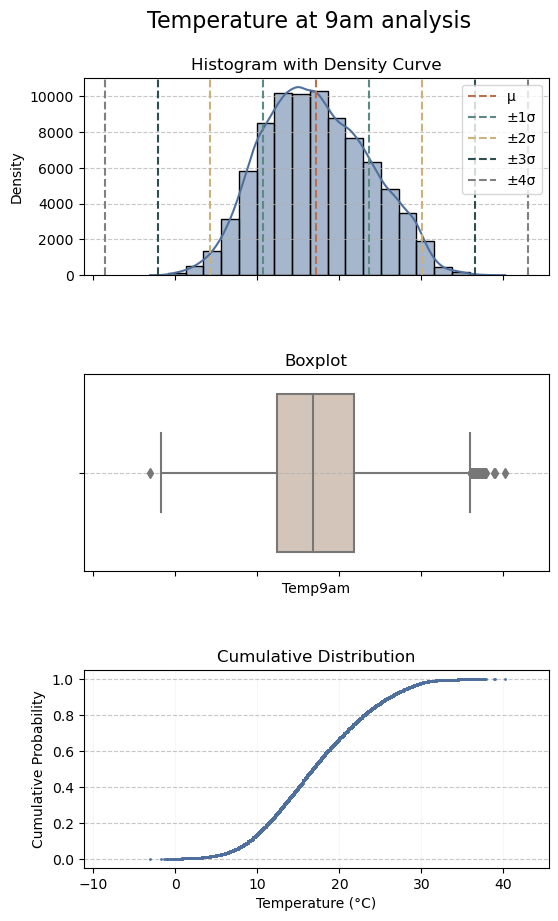

In [15]:
plot_analysis_numerical_variable(weather_data_partly_preprocessed,'Temp9am','Temperature (°C)','Temperature at 9am analysis')

In [16]:
Kolmogorow_Smirnov_Test(weather_data_partly_preprocessed,'Temp9am')

Test statistic = 0.9925169614101156, p-value = 0.0 < 0.05: The data is not normally distributed


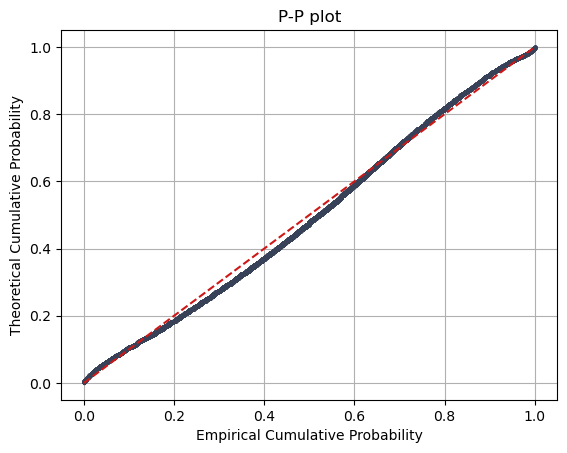

In [17]:
P_P_plot(weather_data_partly_preprocessed, 'Temp9am')

<Figure size 800x600 with 0 Axes>

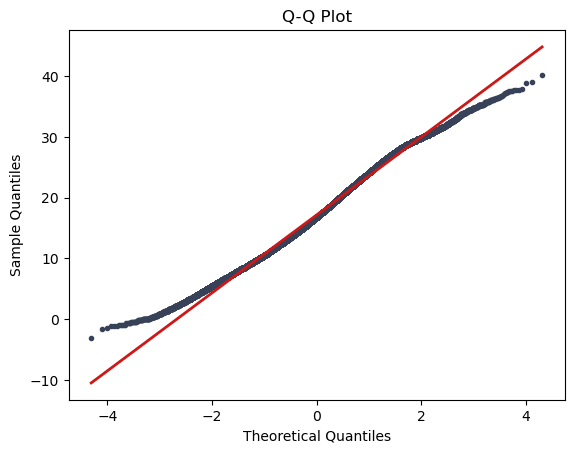

In [18]:
Q_Q_plot(weather_data_partly_preprocessed, 'Temp9am')

#### Temp3pm


In [ ]:
plot_analysis_numerical_variable(weather_data_partly_preprocessed,'Temp3pm','Temperature (°C)','Temperature at 3pm analysis')

In [ ]:
Kolmogorow_Smirnov_Test(weather_data_partly_preprocessed,'Temp3pm')

In [ ]:
P_P_plot(weather_data_partly_preprocessed, 'Temp3pm')

In [ ]:
Q_Q_plot(weather_data_partly_preprocessed, 'Temp3pm')

## <span style='color: #3F2E3E;'>Min/MaxTemp - continuous - interval</span>
#### <span style='color: #A78295;'>The minimum/maximum temperature during a particular day. (degree Celsius) </span>

#### MinTemp

In [ ]:
plot_analysis_numerical_variable(weather_data_partly_preprocessed,'MinTemp','Temperature (°C)','The minimum temperature during a day')

In [ ]:
Kolmogorow_Smirnov_Test(weather_data_partly_preprocessed,'MinTemp')

In [ ]:
P_P_plot(weather_data_partly_preprocessed, 'MinTemp')

In [ ]:
Q_Q_plot(weather_data_partly_preprocessed, 'MinTemp')

#### MaxTemp

In [ ]:
plot_analysis_numerical_variable(weather_data_partly_preprocessed,'MaxTemp','Temperature (°C)','The maximum temperature during a day')

In [ ]:
Kolmogorow_Smirnov_Test(weather_data_partly_preprocessed,'MaxTemp')

In [ ]:
P_P_plot(weather_data_partly_preprocessed, 'MaxTemp')

In [ ]:
Q_Q_plot(weather_data_partly_preprocessed, 'MaxTemp')

## <span style='color: #3F2E3E;'>Rainfall - continuous - ratio </span>
#### <span style='color: #A78295;'>Rainfall during a particular day. (millimeters)</span>

In [ ]:
weather_data_partly_preprocessed.describe()

In [ ]:
weather_data_partly_preprocessed[weather_data_partly_preprocessed['Rainfall'] > 50 ].shape

In [ ]:
# pd.set_option('display.max_rows', None)
outliers = weather_data_partly_preprocessed[weather_data_partly_preprocessed['Rainfall'] > 50 ]
outliers['State/Province'].value_counts()
# outliers['State/Province'].nunique()

In [ ]:
plot_analysis_numerical_variable(weather_data_partly_preprocessed,'Rainfall','Milimeters (mm)','Rainfall during a day')

In [ ]:
Kolmogorow_Smirnov_Test(weather_data_partly_preprocessed,'Rainfall')

In [ ]:
P_P_plot(weather_data_partly_preprocessed, 'Rainfall')

In [ ]:
Q_Q_plot(weather_data_partly_preprocessed, 'Rainfall')

## <span style='color: #3F2E3E;'>WindGustSpeed - continuous - ratio</span>
#### <span style='color: #A78295;'>Speed of strongest gust during a particular day. (kilometers per hour)</span>

In [ ]:
plot_analysis_numerical_variable(weather_data_partly_preprocessed,'WindGustSpeed','Gust speed (km/h)','Speed of strongest gust during a day')


In [ ]:
# pd.set_option('display.max_rows', None)
# sorted(weather_data_partly_preprocessed['WindGustSpeed'].unique())

## <span style='color: #3F2E3E;'>WindSpeed9am/3pm - continuous - ratio</span>
#### <span style='color: #A78295;'>Speed of the wind for 10 min prior to 9 am. / 3pm. (kilometers per hour)</span>

#### WindSpeed9am

In [ ]:
plot_analysis_numerical_variable(weather_data_partly_preprocessed,'WindSpeed9am','Wind speed (km/h)','Speed of the wind for 10 min prior to 9 am')

#### WindSpeed3pm

In [ ]:
plot_analysis_numerical_variable(weather_data_partly_preprocessed,'WindSpeed3pm','Wind speed (km/h)','Speed of the wind for 10 min prior to 3 pm')

## <span style='color: #3F2E3E;'>Humidity9am/3pm - continuous - ratio</span>
#### <span style='color: #A78295;'>The humidity of the wind at 9 am. / 3pm. (percent)</span>

In [ ]:
plot_analysis_numerical_variable(weather_data_partly_preprocessed,'Humidity9am','Humidity (%)','The humidity of the wind at 9 am')

In [ ]:
plot_analysis_numerical_variable(weather_data_partly_preprocessed,'Humidity3pm','Humidity (%)','The humidity of the wind at 3 pm')

## <span style='color: #3F2E3E;'>Pressure9am/3pm - continuous - ratio</span>
#### <span style='color: #A78295;'> Atmospheric pressure at 9 am. / 3pm. (hectopascals)</span>

In [ ]:
plot_analysis_numerical_variable(weather_data_partly_preprocessed,'Pressure9am','Pressure (hPa)','Atmospheric pressure at 9 am')

In [ ]:
plot_analysis_numerical_variable(weather_data_partly_preprocessed,'Pressure3pm','Pressure (hPa)','Atmospheric pressure at 3 pm')

In [ ]:
Kolmogorow_Smirnov_Test(weather_data_partly_preprocessed,'Pressure9am')

In [ ]:
Kolmogorow_Smirnov_Test(weather_data_partly_preprocessed,'Pressure3pm')

In [ ]:
Q_Q_plot(weather_data_partly_preprocessed, 'Pressure9am')

In [ ]:
Q_Q_plot(weather_data_partly_preprocessed, 'Pressure3pm')

## <span style='color: #3F2E3E;'>Sunshine - continuous - ratio</span>
#### <span style='color: #A78295;'>Bright sunshine during a particular day. (hours) </span>

In [ ]:
plot_analysis_numerical_variable(weather_data_partly_preprocessed,'Sunshine','Sunshine (h)','Bright sunshine during a day')

In [19]:
weather_data_sunshine = weather_data_partly_preprocessed.copy()
# weather_data_sunshine = weather_data_sunshine.dropna(subset='Sunshine')

In [ ]:
#weather_data_partly_preprocessed[weather_data_partly_preprocessed['Sunshine'].isnull()]['State/Province'].value_counts()

In [ ]:
# Fill the gaps -> KDE kernel density estimation for non-normally distributed data
# I also notice that in windgustspeed we have only integers, the CDE is not a continuous line, what may indicate that 
# the data distribution is higly irregular or discrete and the KDE approach may not be the most appropriate there. 
# This is because the KDE might not accurately capture the distribution, and sampling from it might lead to unrealistic imputed values.
# Fortunately, in our both examples we have continuous CDE

In [20]:
def random_imputation(df,variable):
    
    observed_data = df[variable].dropna()
    missing_indices = df[variable].isnull()

    # Fit a kernel density estimate to the observed data
    kde = gaussian_kde(observed_data)

    # Get the number of missing values
    num_missing = missing_indices.sum()

    # Generate random values from the KDE
    random_values = np.abs(kde.resample(num_missing)[0]) # at the beginning I did not ensure that my outputs remain positive, np.abs was important step! (now the distributions are similar, before not really)

    # Fill missing values with random values
    df.loc[missing_indices, variable] = random_values
    
    return df

In [21]:
weather_data_sunshine = random_imputation(weather_data_sunshine, 'Sunshine')

In [ ]:
plot_analysis_numerical_variable(weather_data_sunshine,'Sunshine','Sunshine (h)','Bright sunshine during a day')

In [ ]:
weather_data_partly_preprocessed['Sunshine'].describe()

In [ ]:
#weather_data_sunshine.isnull().sum()
weather_data_sunshine['Sunshine'].describe()

In [ ]:
#should i generate only outputs from the range that i have or can i somehowe modify the range? There is a difference in max values
# if i use np.clip to ensure that the imputed values remain within the original range (bounded by the minimum and maximum values of the observed data)
# the results will be catastrophic, different mean std cdf -> i think better to stick to the first option

## <span style='color: #3F2E3E;'>Evaporation - continuous - ratio</span>
#### <span style='color: #A78295;'>Evaporation during a particular day. (millimeters)</span>

In [ ]:
plot_analysis_numerical_variable(weather_data_sunshine,'Evaporation','Evaporation (mm)','Evaporation during a particular day.')

In [22]:
weather_data_evaporation = weather_data_sunshine.copy()

In [23]:
weather_data_evaporation = random_imputation(weather_data_evaporation, 'Evaporation')

In [ ]:
plot_analysis_numerical_variable(weather_data_evaporation,'Evaporation','Evaporation (mm)','Evaporation during a particular day.')

In [ ]:
weather_data_sunshine['Evaporation'].describe()

In [ ]:
weather_data_evaporation['Evaporation'].describe()

In [24]:
weather_data_preprocessed = weather_data_evaporation.copy()

## Correlation - the dependency between numerical values

In [25]:
columns_to_exclude = ['Location','State/Province','Latitude','Longitute','WindGustDir','WindDir9am','WindDir3pm','Cloud9am','Cloud3pm','RainTomorrow','RainToday']
len(columns_to_exclude)
selected_columns = [col for col in weather_data_preprocessed.columns if col not in columns_to_exclude]
numeric_df = weather_data_preprocessed[selected_columns]

In [26]:
correlation_matrix = numeric_df.corr(numeric_only=True)
correlation_matrix

def color_negative_red(val):
    color = 'red' if val > 0.7 else 'black'
    return 'color: %s' % color

correlation_matrix.style.applymap(color_negative_red)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.731385,0.111395,0.298567,0.044930,0.197776,0.205542,0.173511,-0.249142,0.019672,-0.454002,-0.464720,0.903277,0.706255
MaxTemp,0.731385,1.000000,-0.070303,0.378032,0.272674,0.092379,0.036361,0.043868,-0.525702,-0.499793,-0.331568,-0.424880,0.882853,0.984687
Rainfall,0.111395,-0.070303,1.000000,-0.031439,-0.142796,0.133391,0.090535,0.067054,0.224926,0.257235,-0.170624,-0.130337,0.016506,-0.075195
Evaporation,0.298567,0.378032,-0.031439,1.000000,0.176891,0.131001,0.123062,0.075715,-0.323393,-0.249454,-0.170314,-0.185414,0.351065,0.367484
Sunshine,0.044930,0.272674,-0.142796,0.176891,1.000000,-0.019273,0.003000,0.027173,-0.279518,-0.358313,0.025273,-0.008468,0.170982,0.284476
WindGustSpeed,0.197776,0.092379,0.133391,0.131001,-0.019273,1.000000,0.603203,0.690070,-0.224356,-0.037936,-0.459477,-0.416072,0.169608,0.052149
WindSpeed9am,0.205542,0.036361,0.090535,0.123062,0.003000,0.603203,1.000000,0.512572,-0.273522,-0.030248,-0.231844,-0.181641,0.151107,0.019537
WindSpeed3pm,0.173511,0.043868,0.067054,0.075715,0.027173,0.690070,0.512572,1.000000,-0.133218,0.031956,-0.299938,-0.261114,0.159948,0.017057
Humidity9am,-0.249142,-0.525702,0.224926,-0.323393,-0.279518,-0.224356,-0.273522,-0.133218,1.000000,0.673813,0.144923,0.192346,-0.486145,-0.517335
Humidity3pm,0.019672,-0.499793,0.257235,-0.249454,-0.358313,-0.037936,-0.030248,0.031956,0.673813,1.000000,-0.025285,0.052774,-0.205266,-0.548720


# To measure the dependency between a categorical variable and a numerical variable, we may use varoius methods:
1. **ANOVA (Analysis of Variance)**-  for differences in means between multiple groups of a categorical variable with respect to a numerical variable.
It assesses whether there is a statistically significant difference in the means of the numerical variable across the different categories.
However, ANOVA assumes that the numerical variable follows a normal distribution within each group. 

2. **Kruskal-Wallis Test**: is a non-parametric test that can be used when the assumption of normality is violated (is suitable when the numerical variable is not normally distributed.
It tests whether the median of the numerical variable differs significantly across the categories of the categorical variable.

4. **Mann-Whitney U Test** (Wilcoxon rank-sum test): non-parametric test,  assesses whether there are significant differences in the distribution of the numerical variable between the two groups defined by the binary categorical variable. This test however does not provide information about the direction or magnitude of the difference between the two groups. It only assesses whether there is a significant difference in the distributions.
                                                                                                                
3. **Point-Biserial Correlation / Biserial Correlation**: it is a measure of association between a binary (dichotomous - 2 groups only) variable and a continuous variable. It is similar to the standard Pearson correlation. This correlation coefficient measures the strenght and direction of the <u>linear relationship</u> between variables.It ranges from -1 to 1, where -1 and 1 indicates perfect linear relationship, 0 no linear relationship. 

There are also other options but those are the most popular.  
                                                                                                                
I decided to try both Point-Biserial Correlation and Mann-Whitney U Test. The second one, I also wanted to complete with the plots (violin plots and swarm plot) but swarm plot did not load (probably too much data) and because of it, the differences in the distributions we will see only on violin plot. 

## Point-Biserial Correlation 

In [27]:
from scipy.stats import pointbiserialr

def point_biserial(binary_variable,continuous_variable):
    correlation_coefficient, p_value = pointbiserialr(binary_variable, continuous_variable)

#     print("Point-Biserial Correlation:")
    print("Correlation Coefficient:", correlation_coefficient)
    print("P-value:", p_value,"\n")


In [ ]:
# numeric_df.head(5)

In [28]:
# the correlation coef -> [-1,1], ~ -1,1 strong association, ~ 0 weak
# p-value - measure of the statistical significance of the correlation coef. It represents the probability of obtaining 
# the observed correlation coef by chance (typically 5%). If p-value < 0.05 correlation coef is statistically significant
# and the observed association is unlikely to be due to random chance.

print("Point-Biserial Correlation between RainTomorrow and other numerical variables\n")
for num in numeric_df: 
    print(num)
    point_biserial(weather_data_preprocessed['RainTomorrow'],numeric_df[num])
# all p-values <0.05 -> correlation coefs are statistically significant
# coef: rather they indicate weak association, some of them are positive some negative

Point-Biserial Correlation between RainTomorrow and other numerical variables

MinTemp
Correlation Coefficient: 0.08953857987067163
P-value: 1.0321690284373713e-148 

MaxTemp
Correlation Coefficient: -0.1609207915695236
P-value: 0.0 

Rainfall
Correlation Coefficient: 0.2387237732977852
P-value: 0.0 

Evaporation
Correlation Coefficient: -0.07244005688640909
P-value: 6.910681135115996e-98 

Sunshine
Correlation Coefficient: -0.2651677029274694
P-value: 0.0 

WindGustSpeed
Correlation Coefficient: 0.23618824657937193
P-value: 0.0 

WindSpeed9am
Correlation Coefficient: 0.09506587144856439
P-value: 1.823314033428571e-167 

WindSpeed3pm
Correlation Coefficient: 0.09576553986056144
P-value: 6.393803884345071e-170 

Humidity9am
Correlation Coefficient: 0.26008152112763244
P-value: 0.0 

Humidity3pm
Correlation Coefficient: 0.4518260350186557
P-value: 0.0 

Pressure9am
Correlation Coefficient: -0.24851511040674784
P-value: 0.0 

Pressure3pm
Correlation Coefficient: -0.22993430132077516
P-val

In [ ]:
# weather_data_preprocessed.info()

## Mann-Whitney U Test

Procedure: 

    1. H_0 - there is no difference in the distribution of the numerical variable between the two groups defined by the categorical variable 
    2. H_1 - there is a significant difference -|| - 
    3. Rank the data: 
        - order the numerical variable from the lowest to highest 
        - assign ranks to the data points starting from 1 for the lowest value and increasing by 1 for each subsequent value
        - ties (repeated values) receive the average rank of the tied ranks. ( example 1.5 1.5 3 4 5 ) 
    4. Calculate the U-statistic (there are formulas for small and large number of samples) and p-value
    5. Interpretation: if p-value < 0.05 reject the null hypothesis, if >= 0.05 fail to reject H_0

In [29]:
from scipy.stats import mannwhitneyu

def mann_whitney_u_test(categorical_variable,numerical_variable):
    statistic, p_value = mannwhitneyu(numerical_variable[categorical_variable == 1],
                                  numerical_variable[categorical_variable == 0])

    alpha = 0.05
    print("U-statistic:", statistic)
    print("P-value:", p_value)
    if p_value < alpha:
        print("Reject the null hypothesis. There are significant differences between the groups.\n")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference between the groups.\n")


In [30]:
print("The Mann-Whitney U test between RainTomorrow and other numerical variables\n")
for num in numeric_df: 
    print(num)
    mann_whitney_u_test(weather_data_preprocessed['RainTomorrow'],numeric_df[num])

# In summary, for all the numerical variables tested, the Mann-Whitney U test rejects the null hypothesis 
# and indicates that there are significant differences in the distributions of each numerical variable between RainTomorrow groups

The Mann-Whitney U test between RainTomorrow and other numerical variables

MinTemp
U-statistic: 669195440.0
P-value: 3.308096783412043e-120
Reject the null hypothesis. There are significant differences between the groups.

MaxTemp
U-statistic: 467350221.5
P-value: 0.0
Reject the null hypothesis. There are significant differences between the groups.

Rainfall
U-statistic: 843408324.0
P-value: 0.0
Reject the null hypothesis. There are significant differences between the groups.

Evaporation
U-statistic: 532727419.0
P-value: 7.341226234245208e-125
Reject the null hypothesis. There are significant differences between the groups.

Sunshine
U-statistic: 385147889.0
P-value: 0.0
Reject the null hypothesis. There are significant differences between the groups.

WindGustSpeed
U-statistic: 782658421.5
P-value: 0.0
Reject the null hypothesis. There are significant differences between the groups.

WindSpeed9am
U-statistic: 675070463.0
P-value: 2.579475010038746e-142
Reject the null hypothesis. Th

## Violin plot
It is a hybrid of a box plot and a kernel density plot. It shows the distribution of numerical data. 

Components: 

    - the white dot - median
    - the box plot in the middle
    - the thick grey bar in the center - interquartile range (50% of observations -> Q3-Q1)
    - kernel density plot on the both sides of the violin - shows the probability density of data points at different values
    width = freqency; the wider range, the more frequent value (higher probability)
    - outliers - data points that fall outside the whiskers of the box plot
    
From the violin plot, we can find out for example how many values clustered around the median, min, max or we may compare the medians for different categories.

If the plot is extremely skinny on each end and wide in the middle -> observations are mainly concentrated around the median.

For many categories we can swap the axes (horizontal violin).

In [ ]:
# sns.set(style="whitegrid", palette="pastel", color_codes=True)
# sns.violinplot(x="feed", y="weight", hue="sex", data=df,
#                palette={"male": "b", "female": "y"})
# plt.legend(loc='upper left')
# https://mode.com/blog/violin-plot-examples/

In [31]:
def violin_plot(df,categorical_variable,numerical_variable):
    custom_palette = ["#DBDFEA", "#8294C4"]
    sns.violinplot(x=categorical_variable, y=numerical_variable, data=df,palette=custom_palette)
    sns.despine(left=True)

#     plt.title("Violin Plot",fontweight='bold')
    plt.xlabel(categorical_variable)
    plt.ylabel(numerical_variable)
    plt.grid(axis='y', linestyle='-', alpha=0.3)
    plt.show()

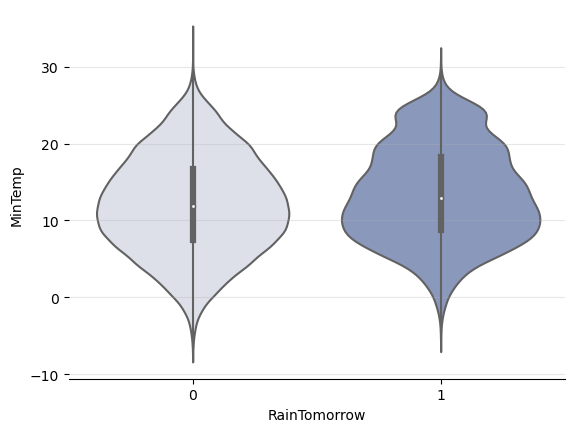

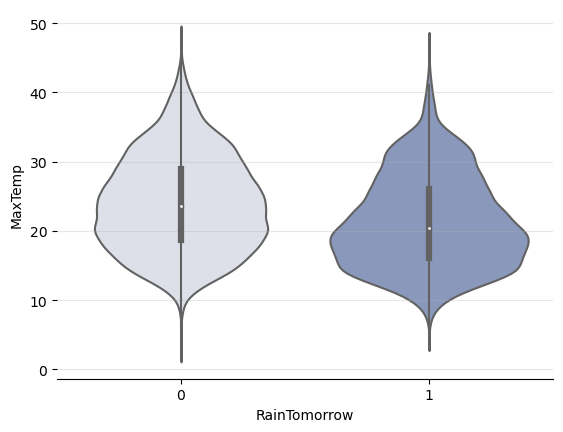

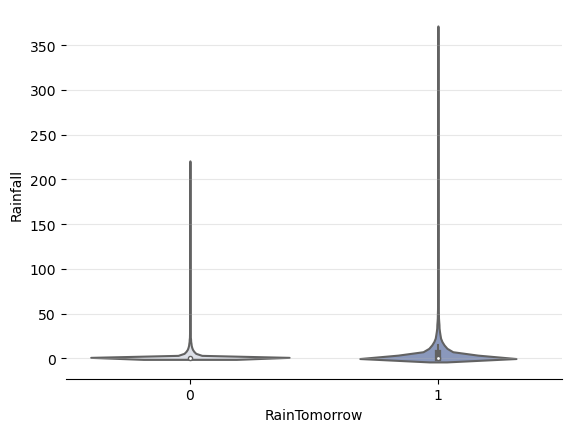

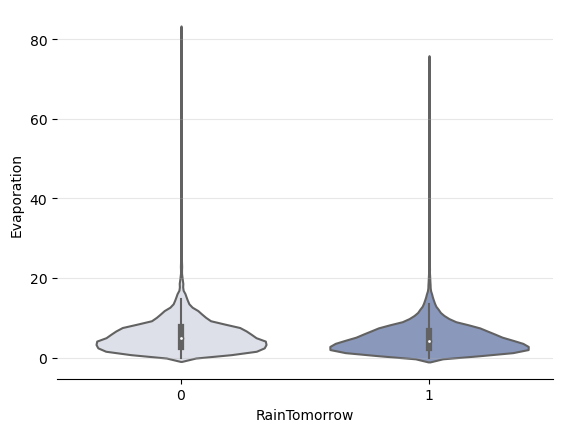

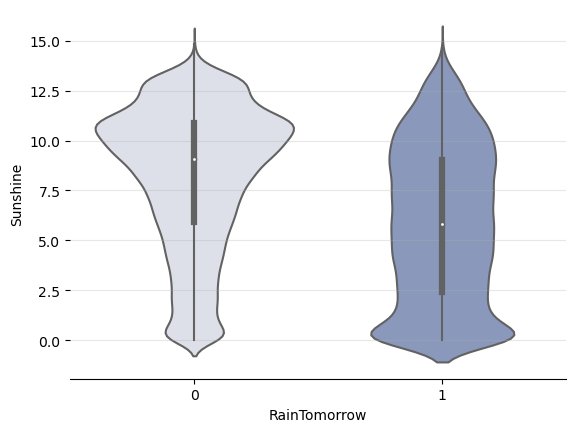

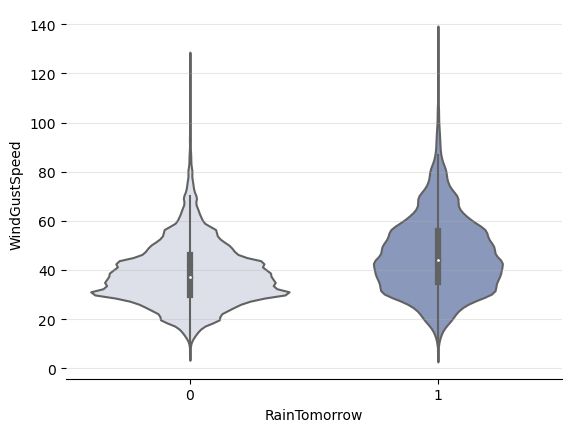

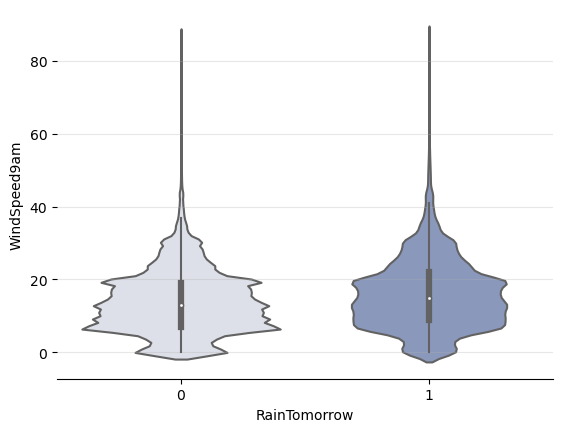

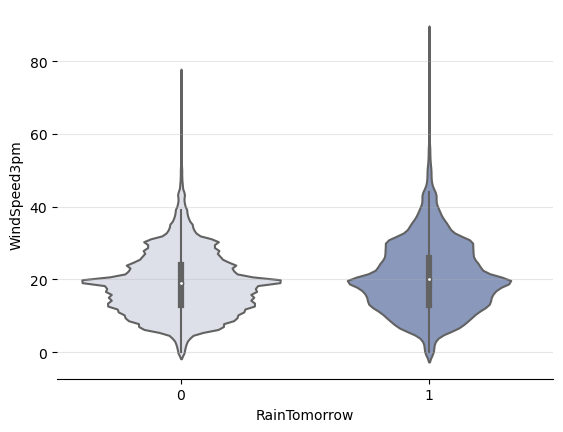

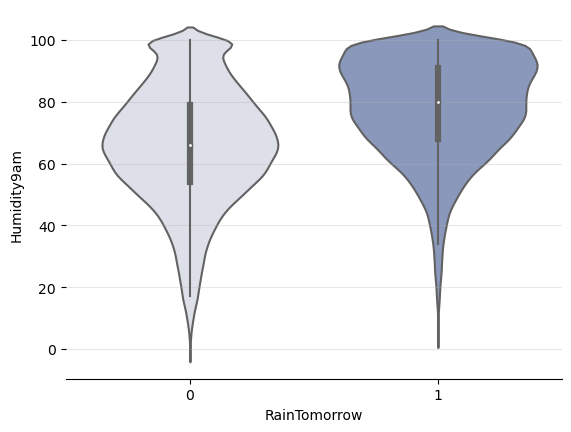

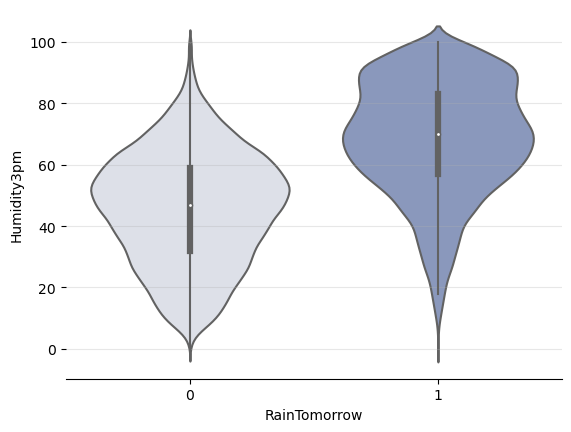

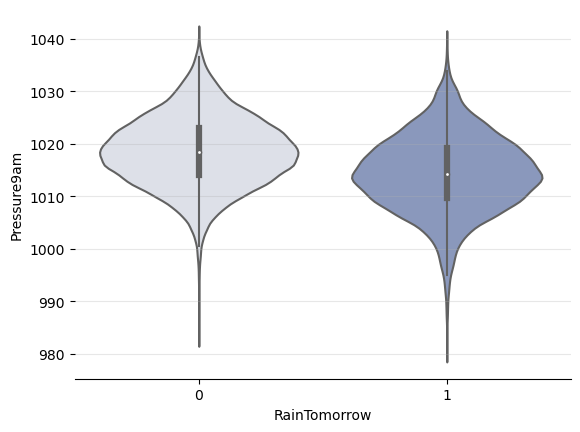

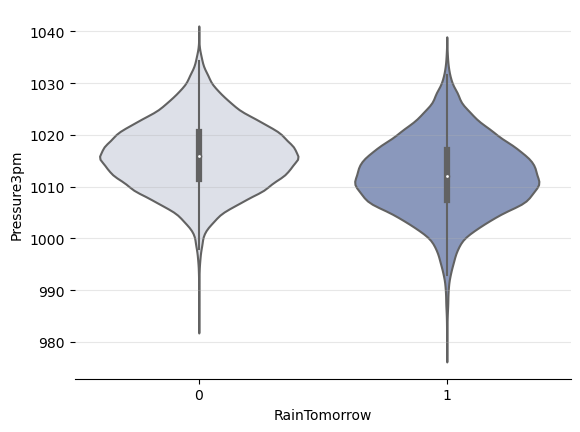

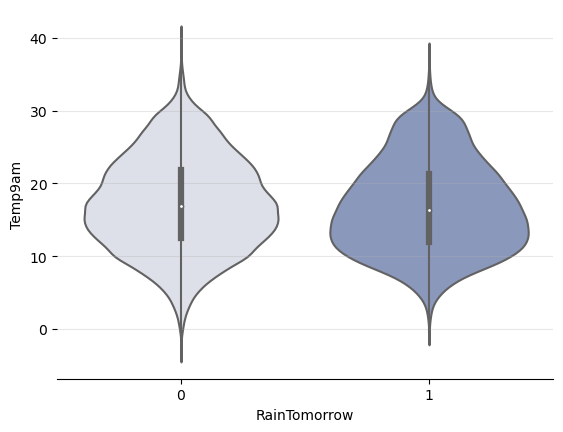

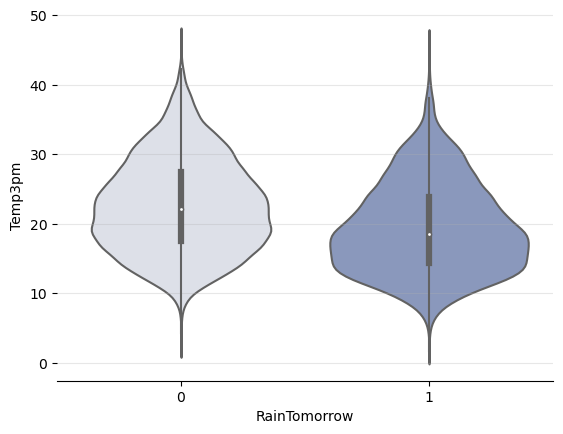

In [32]:
for col in numeric_df.columns:
    violin_plot(weather_data_preprocessed,'RainTomorrow',col)
#observations: mostly values are concentrated around the median,in some variables there are distincive outliers like in rainfall or evaporation

In [ ]:
#sns.swarmplot(x='categorical_var', y='numerical_var', data=data)